# Загрузка данных

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from google.colab import files

In [15]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.9/693.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.



---



Saving train.xlsx to train.xlsx


Saving Цены на сырье.xlsx to Цены на сырье.xlsx


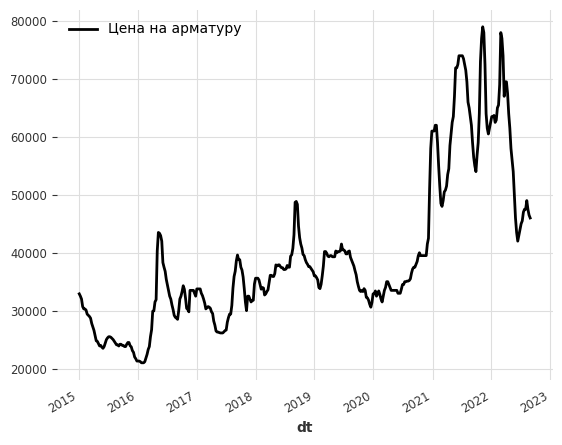

In [16]:
from darts import TimeSeries

trainEXCEL = files.upload()
traim = pd.read_excel(next(iter(trainEXCEL)))
data = TimeSeries.from_dataframe(traim, "dt", "Цена на арматуру")

priceExcel = files.upload()
df1 = pd.read_excel(next(iter(priceExcel)))

data.plot()
plt.legend()

In [17]:
df2 = pd.merge(traim, df1, on="dt")
df2

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Лом_3А, РФ FCA ж/д Свердловская обл, руб./т, без НДС","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09,30300,3850,228,12344,10009,12728,62,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-16,30100,3850,206,12271,10432,12852,63,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-02-23,29400,3850,207,12645,11981,13034,64,NaN,3700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-03-02,29200,3850,214,12696,11912,12910,63,NaN,3700.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
4,2015-03-09,29000,4400,232,12916,12061,12964,61,NaN,4050.0,...,NaN,NaN,3540.0,2097.0,1261.0,23.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2022-08-01,47500,8900,317,23751,17547,21835,112,445.0,7500.0,...,NaN,435.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0
391,2022-08-08,49000,7750,321,25568,21195,23534,109,435.0,6500.0,...,NaN,420.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0
392,2022-08-15,47500,7750,357,26015,21461,23841,109,455.0,6500.0,...,NaN,430.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0
393,2022-08-22,46500,7750,361,25881,21510,24239,102,455.0,6500.0,...,NaN,430.0,4602.0,3405.0,1984.0,41.0,51.0,72.0,90.0,159.0


## Проверка регресии на sklearn

In [18]:
df3 = df2.copy()
df3 = df3.dropna(axis=1, how='all')
df3 = df3.fillna(0)
df3['dt'] = df3['dt'].values.astype(float)

In [19]:
# нормализация
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df3.columns:
    df3[col] = absolute_maximum_scale(df3[col])

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 50 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   dt                                                                                                395 non-null    float64
 1   Цена на арматуру                                                                                  395 non-null    float64
 2   Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС                                  395 non-null    float64
 3   Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                                                          395 non-null    float64
 4   Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                      395 non-null    float64
 5   Л

In [21]:
X1 = df3.drop(columns='Цена на арматуру')
y1 = df3['Цена на арматуру']

In [22]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [23]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
answers_pred1 = model1.predict(X1_test)


In [24]:
# Метрики
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


print("R^2 : ", r2_score(y1_test, answers_pred1))
print("MAE :", mean_absolute_error(y1_test,answers_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y1_test, answers_pred1)))

R^2 :  0.946405775233036
MAE : 0.027910389787684557
RMSE: 0.03704647427097123


In [25]:
df3

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,0.856601,0.383544,0.169231,0.371336,0.350821,0.321450,0.371479,0.275556,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.856965,0.381013,0.169231,0.335505,0.348747,0.335035,0.375099,0.280000,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.857329,0.372152,0.169231,0.337134,0.359376,0.384783,0.380410,0.284444,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.857693,0.369620,0.169231,0.348534,0.360825,0.382567,0.376791,0.280000,0.000000,0.194737,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
4,0.858056,0.367089,0.193407,0.377850,0.367078,0.387353,0.378367,0.271111,0.000000,0.213158,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.998544,0.601266,0.391209,0.516287,0.675013,0.563542,0.637276,0.497778,0.520468,0.394737,...,0.495,0.541045,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
391,0.998908,0.620253,0.340659,0.522801,0.726653,0.680701,0.686863,0.484444,0.508772,0.342105,...,0.470,0.522388,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
392,0.999272,0.601266,0.340659,0.581433,0.739357,0.689244,0.695823,0.484444,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
393,0.999636,0.588608,0.340659,0.587948,0.735548,0.690818,0.707440,0.453333,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284


## Регрессия через Darts

---



In [27]:
df4 = df2.copy()
df4 = df4.dropna(axis=1, how='all')
df4 = df4.fillna(0)

def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df4.columns:
    if col != 'dt' and col != 'Цена на арматуру':
      df4[col] = absolute_maximum_scale(df4[col])

df4

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в концентрате, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в окатыши, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т"
0,2015-02-09,30300,0.169231,0.371336,0.350821,0.321450,0.371479,0.275556,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-02-16,30100,0.169231,0.335505,0.348747,0.335035,0.375099,0.280000,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2015-02-23,29400,0.169231,0.337134,0.359376,0.384783,0.380410,0.284444,0.000000,0.194737,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2015-03-02,29200,0.169231,0.348534,0.360825,0.382567,0.376791,0.280000,0.000000,0.194737,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
4,2015-03-09,29000,0.193407,0.377850,0.367078,0.387353,0.378367,0.271111,0.000000,0.213158,...,0.000,0.000000,0.204117,0.165784,0.188801,0.237113,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2022-08-01,47500,0.391209,0.516287,0.675013,0.563542,0.637276,0.497778,0.520468,0.394737,...,0.495,0.541045,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
391,2022-08-08,49000,0.340659,0.522801,0.726653,0.680701,0.686863,0.484444,0.508772,0.342105,...,0.470,0.522388,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
392,2022-08-15,47500,0.340659,0.581433,0.739357,0.689244,0.695823,0.484444,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284
393,2022-08-22,46500,0.340659,0.587948,0.735548,0.690818,0.707440,0.453333,0.532164,0.342105,...,0.465,0.534826,0.265352,0.269191,0.297050,0.422680,0.265625,0.258993,0.412844,0.593284


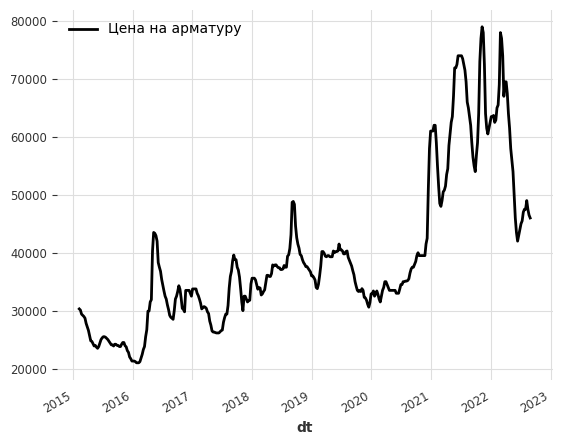

In [28]:
time = TimeSeries.from_dataframe(df4, 'dt')
time['Цена на арматуру'].plot()

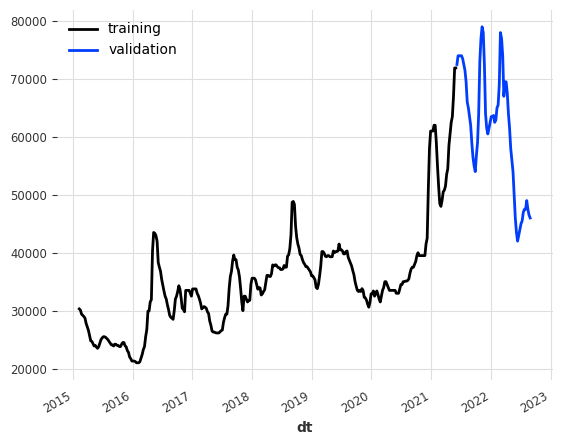

In [29]:
train, val = time.split_before(pd.Timestamp("20210601"))
train['Цена на арматуру'].plot(label="training")
val['Цена на арматуру'].plot(label="validation")

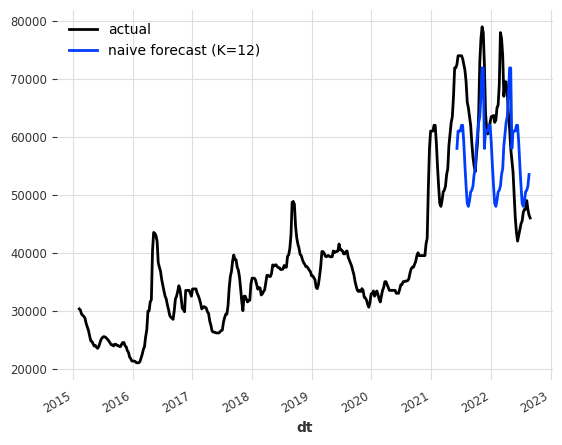

In [32]:
# Тестим базовую регрессионную модель
from darts.models import NaiveSeasonal
from darts.utils.statistics import plot_acf, check_seasonality

seasonal_model = NaiveSeasonal(K=24)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(64)

time['Цена на арматуру'].plot(label="actual")
seasonal_forecast['Цена на арматуру'].plot(label="naive forecast (K=12)")

In [33]:
# Тестим результат нейронной сети
from darts.models import NBEATSModel
model = NBEATSModel(input_chunk_length=24,
                             output_chunk_length=12)
model.fit(train)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 15.4 M
---------------------------------------------------
15.3 M    Trainable params
8.3 K     Non-trainable params
15.4 M    Total params
61.421    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12)

In [34]:
pred = model.predict(n=36, series=time)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

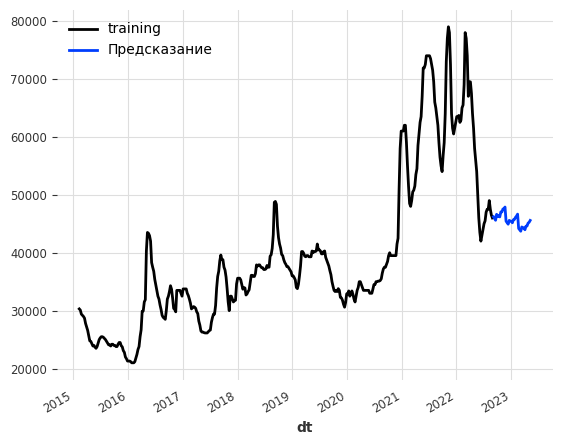

In [35]:
time['Цена на арматуру'].plot(label="training")
pred['Цена на арматуру'].plot(label="Предсказание")

In [36]:
predictionDataframe = pred.pd_dataframe()[['Цена на арматуру']]

N = 10

T = 10
weeks_size = N

predictionDataframe["moving_average"] = predictionDataframe["Цена на арматуру"].rolling(weeks_size).mean()
predictionDataframe["upper"] = predictionDataframe["moving_average"] + 0.5 * predictionDataframe["Цена на арматуру"].rolling(weeks_size).std()
predictionDataframe["lower"] = predictionDataframe["moving_average"] - 0.5 * predictionDataframe["Цена на арматуру"].rolling(weeks_size).std()

interval = T + N

predictionDataframe = predictionDataframe.tail(interval)

In [37]:
predictionDataframe

component,Цена на арматуру,moving_average,upper,lower
dt,,,,
2022-12-26,45482.459589,46373.131639,46946.616889,45799.646389
2023-01-02,45429.104962,46211.615671,46789.441210,45633.790132
2023-01-09,45167.274859,46025.179026,46604.699522,45445.658530
2023-01-16,45697.693160,45840.356885,46355.230180,45325.483591
2023-01-23,45750.052245,45654.827460,46066.199057,45243.455863
2023-01-30,46106.736358,45477.250295,45645.450059,45309.050531
2023-02-06,46325.684868,45565.072046,45779.827035,45350.317058
2023-02-13,46657.761296,45711.731954,45975.222378,45448.241529
2023-02-20,44188.408277,45638.333527,45977.571414,45299.095641


## Сохраняем получившуюся модель

---



In [38]:
model.save('savedmodel.pt')

In [39]:
model = NBEATSModel(input_chunk_length=24,
                             output_chunk_length=12).load('savedmodel.pt')

In [40]:
pred = model.predict(n=36, series=val)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

In [41]:
pred.pd_dataframe()[['Цена на арматуру']]

component,Цена на арматуру
dt,
2022-09-05,46206.505631
2022-09-12,45911.815628
2022-09-19,45595.896912
2022-09-26,46630.314043
2022-10-03,46248.898480
2022-10-10,46440.508956
2022-10-17,46180.526855
2022-10-24,47044.264640
2022-10-31,47031.641310
